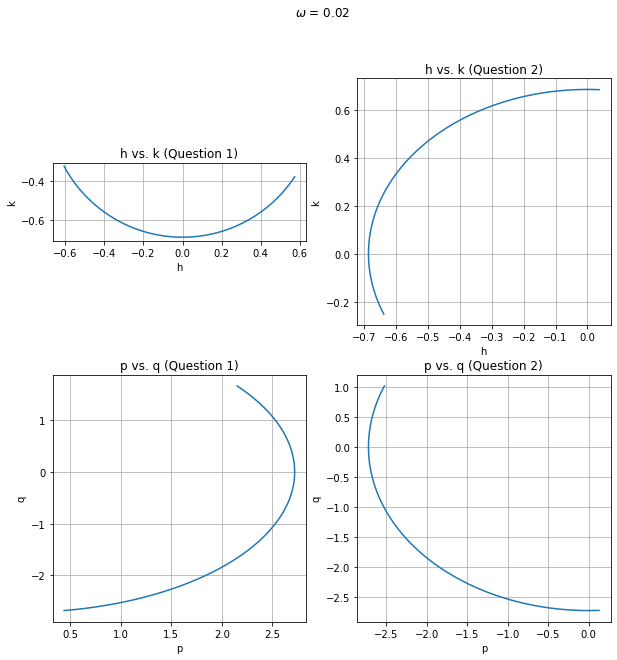

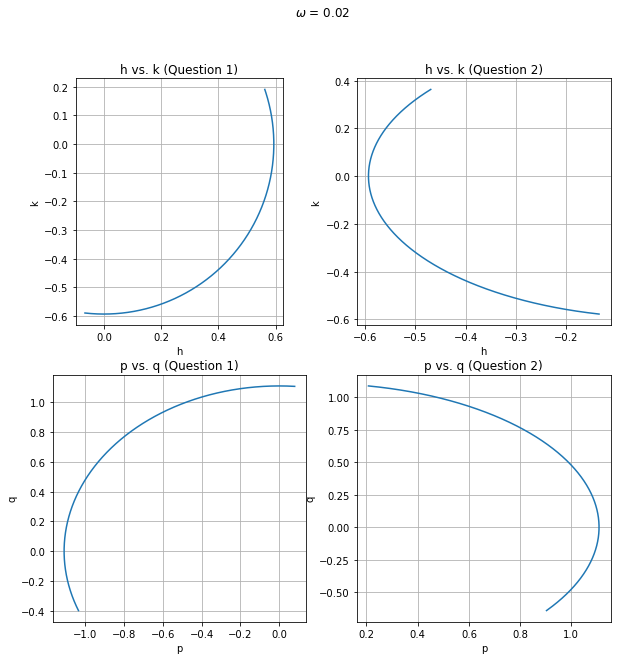

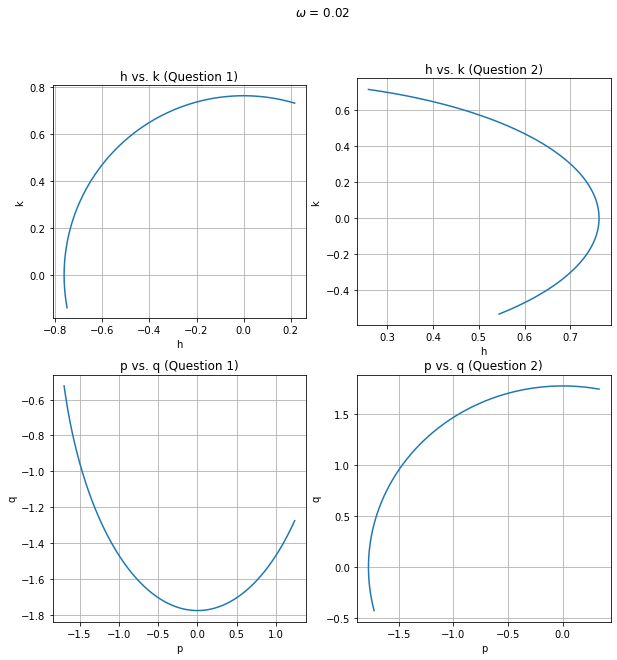

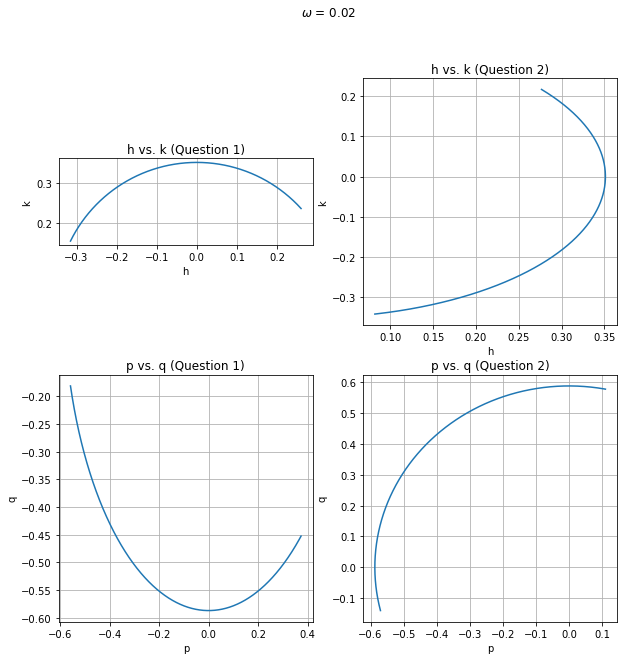

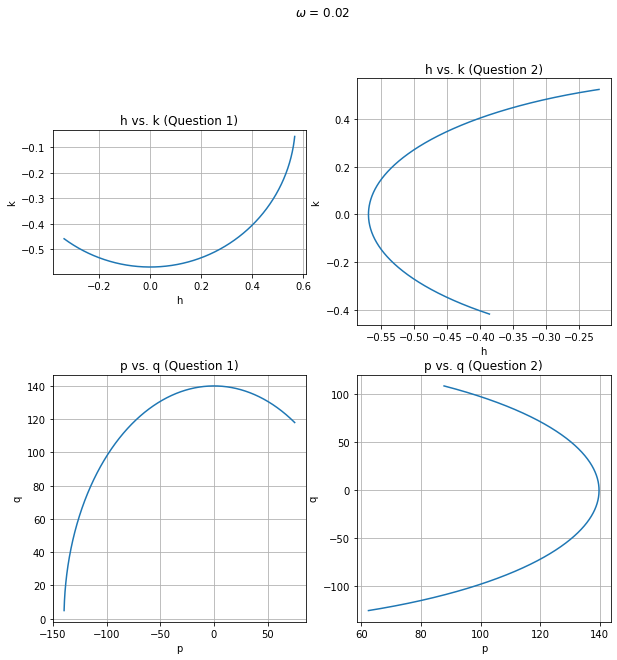

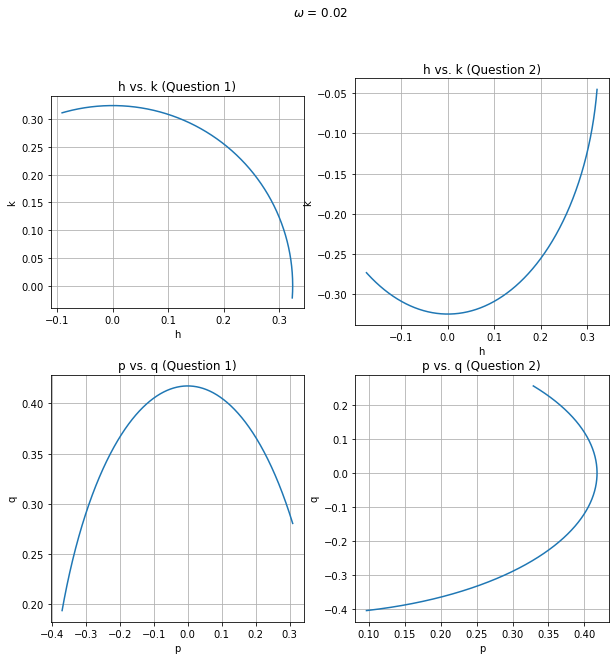

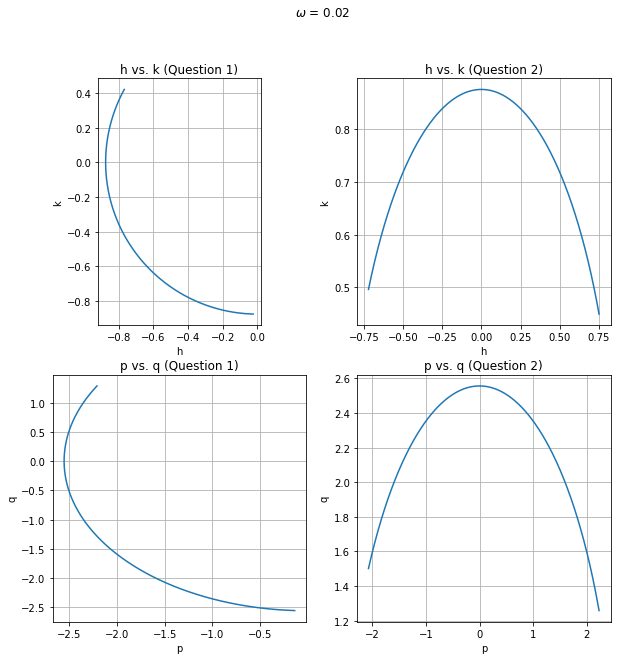

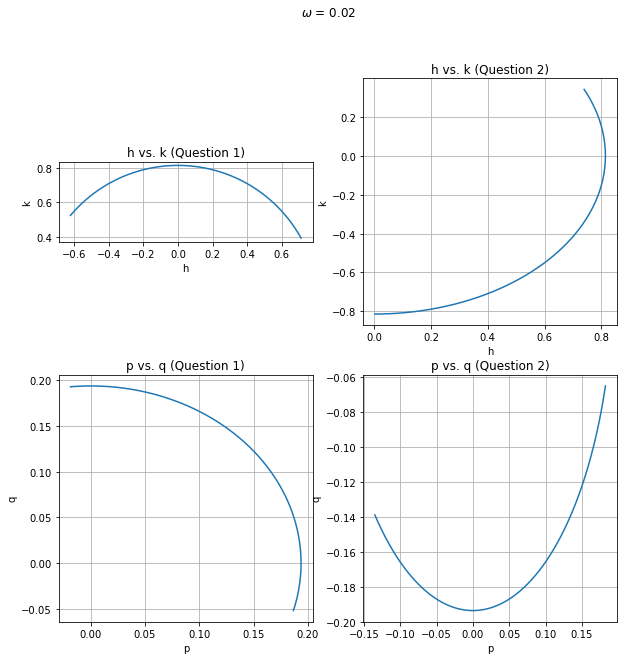

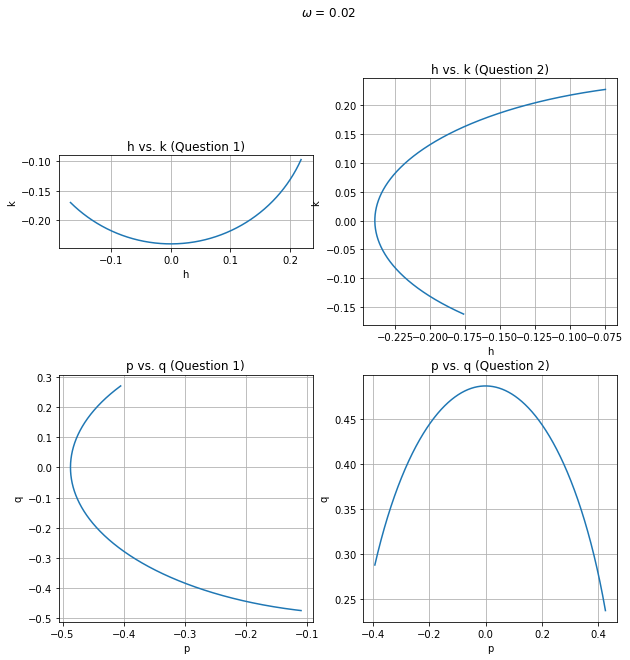

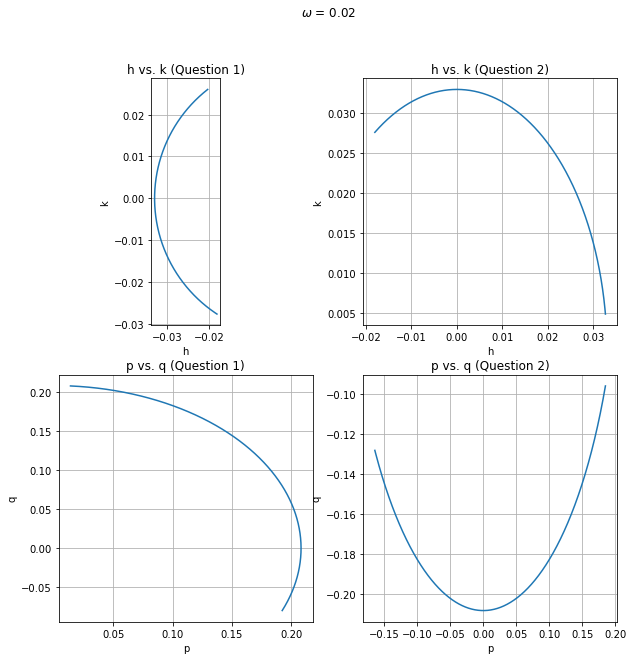

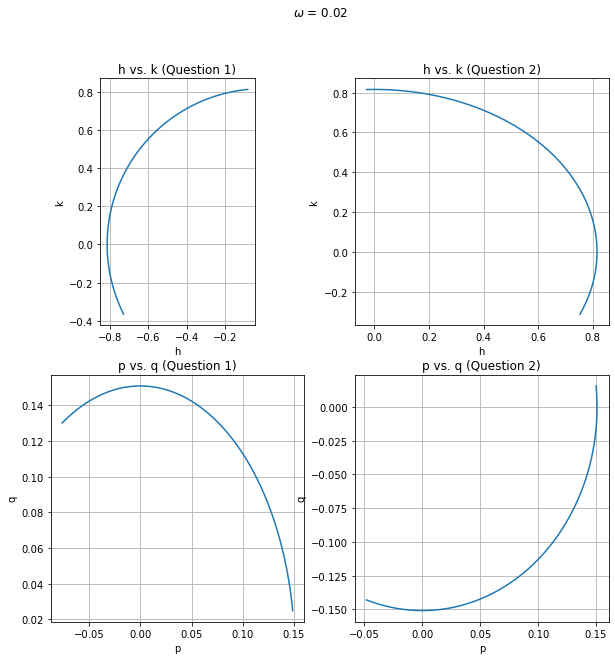

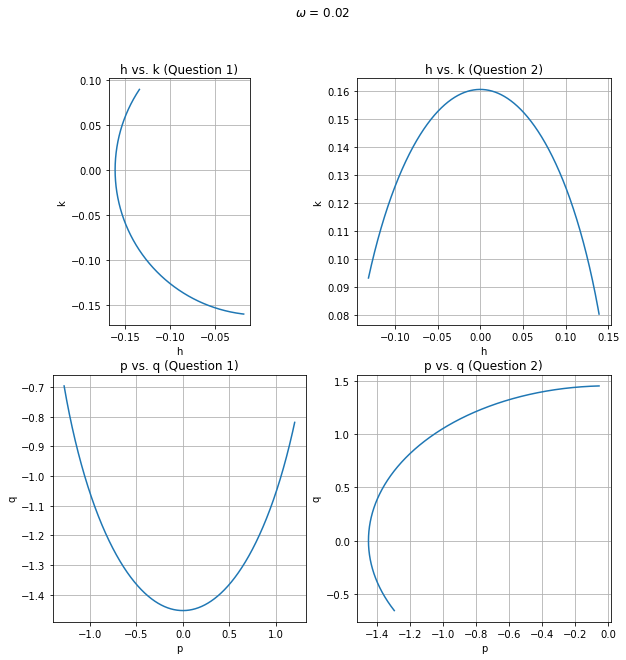

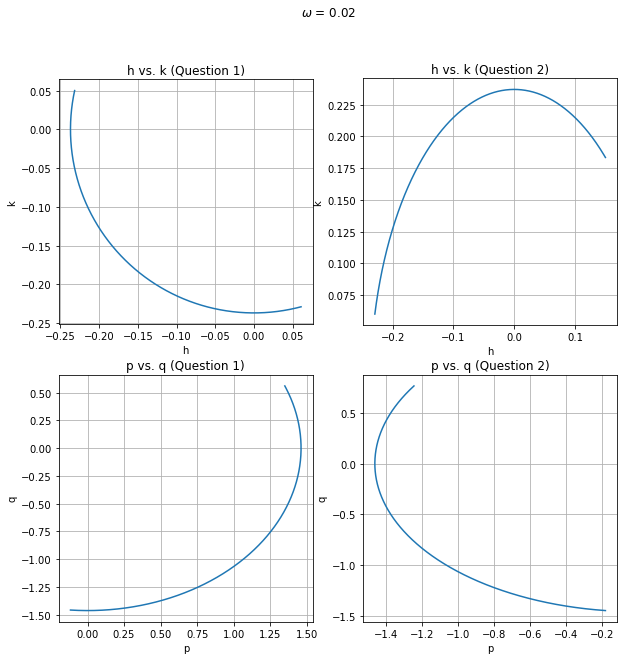

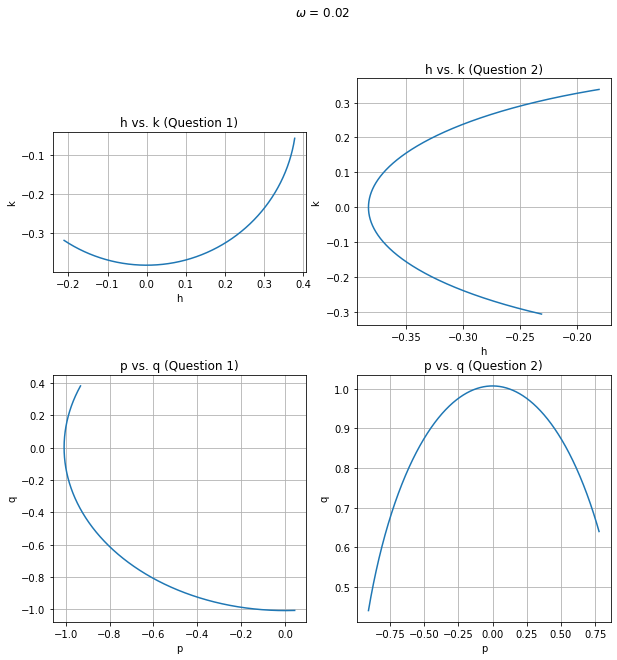

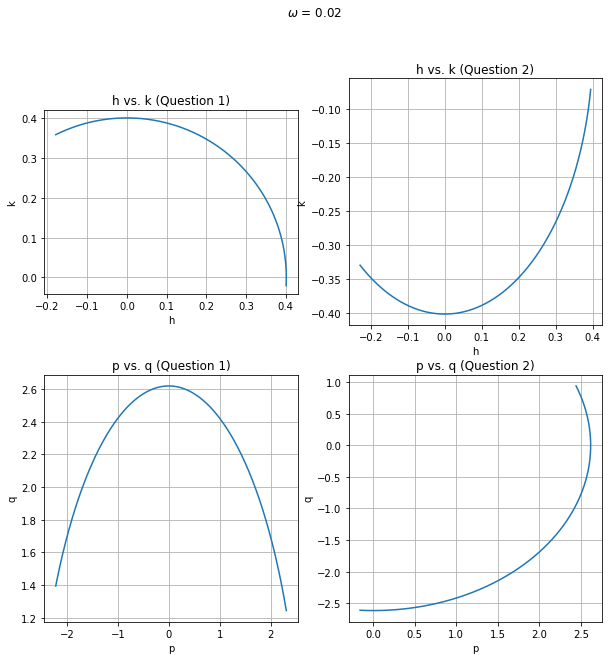

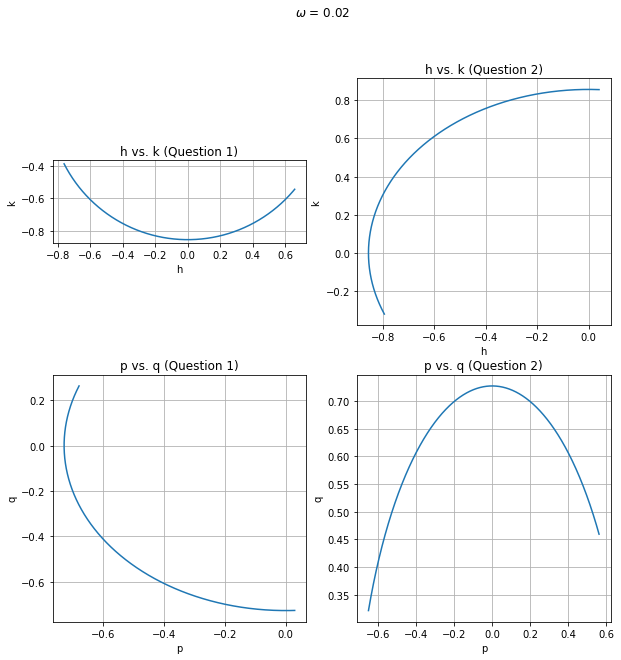

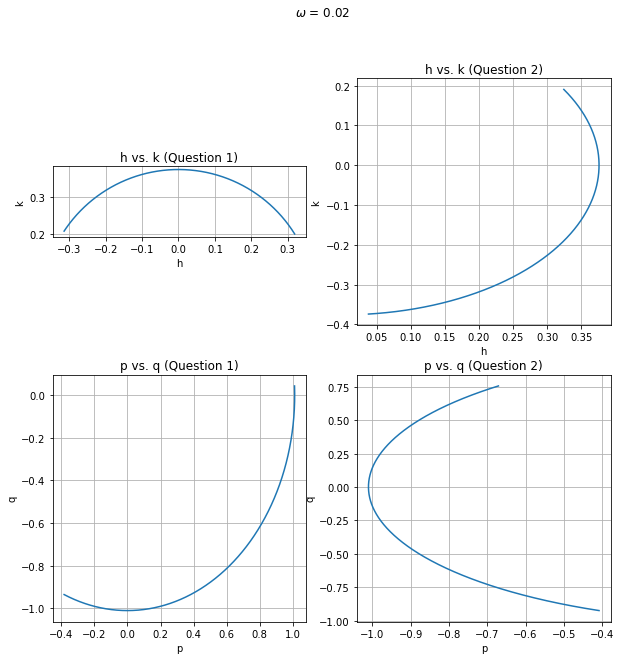

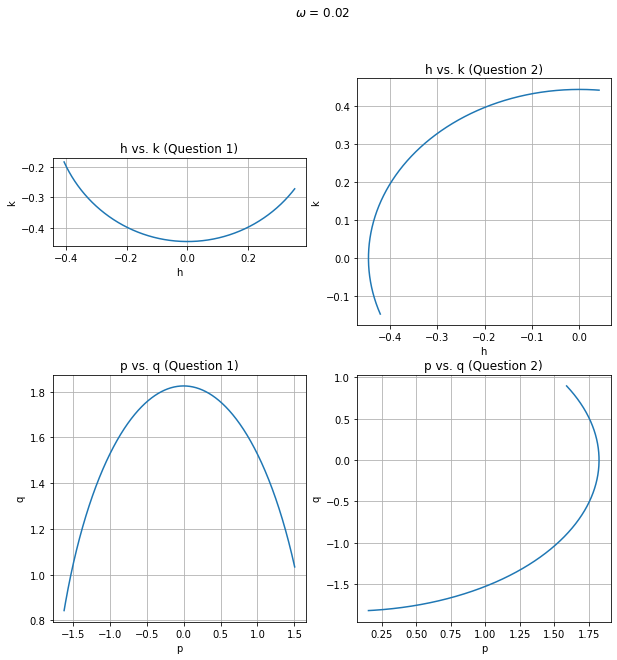

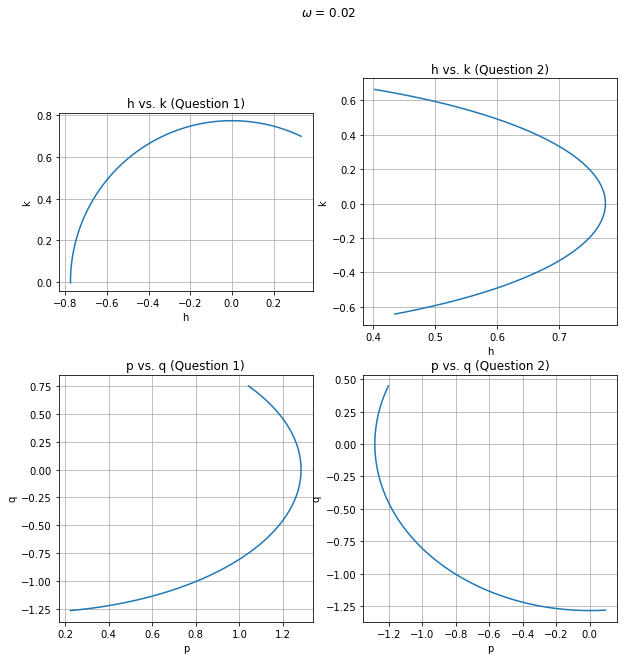

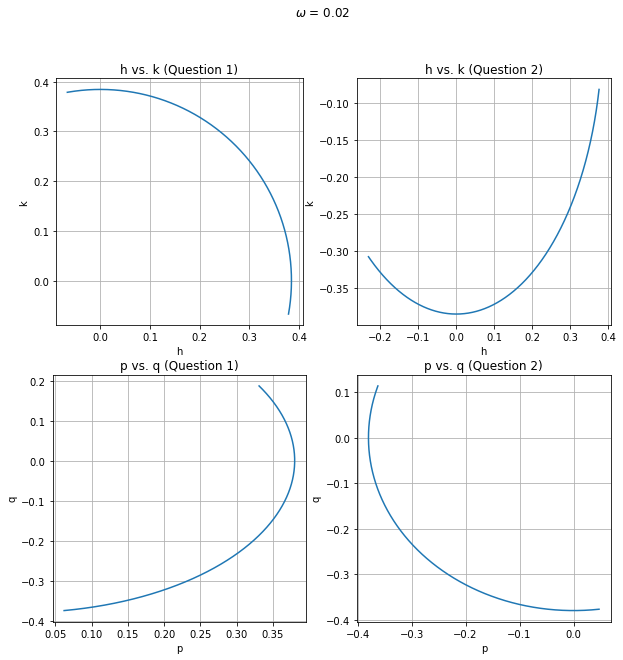

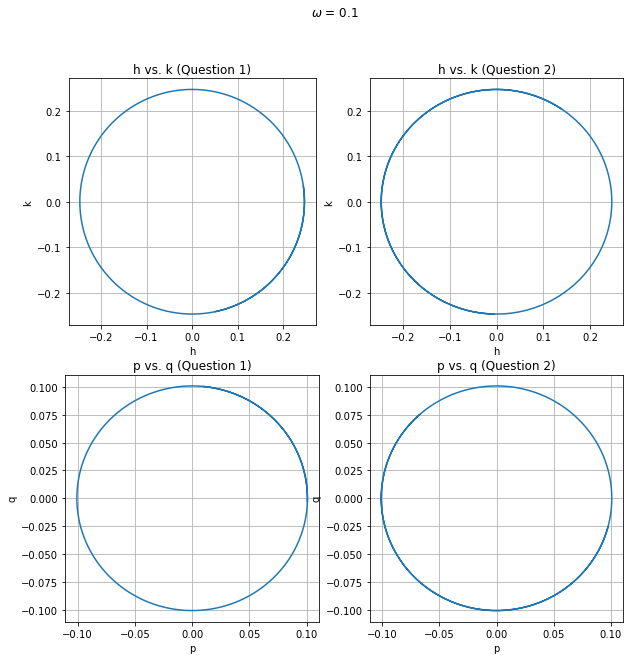

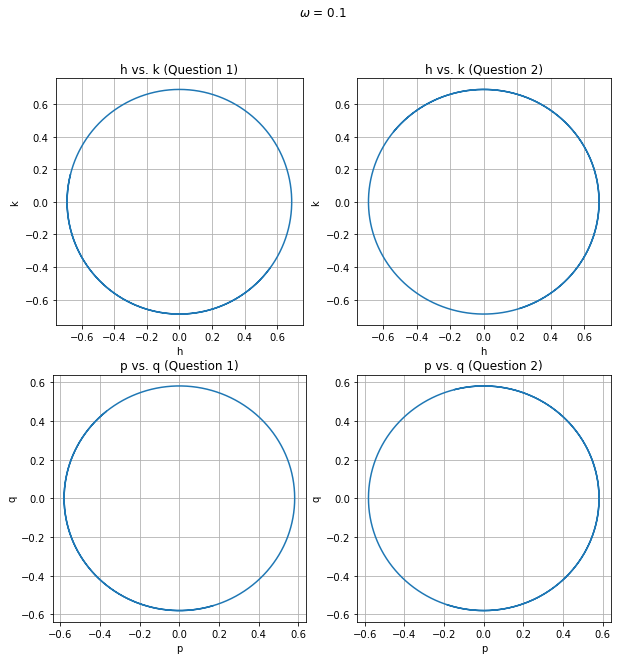

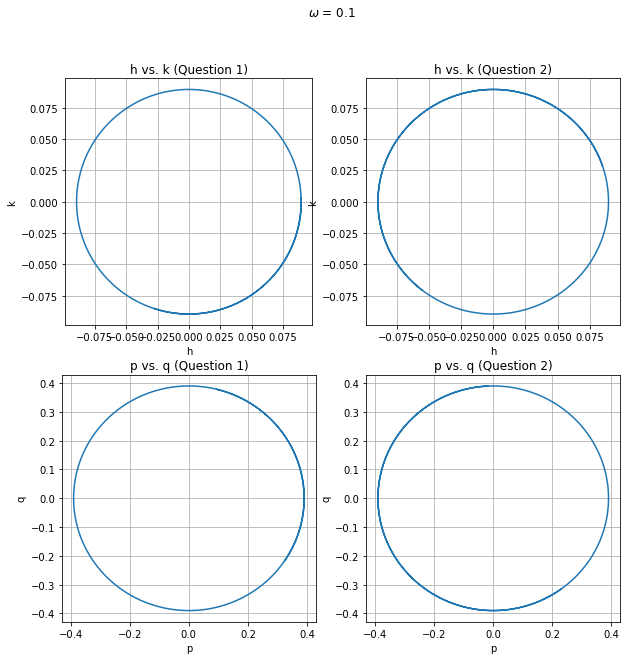

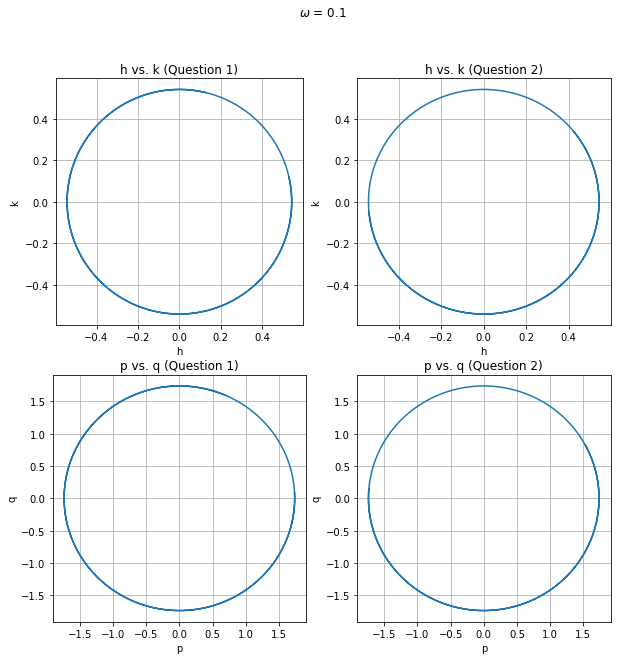

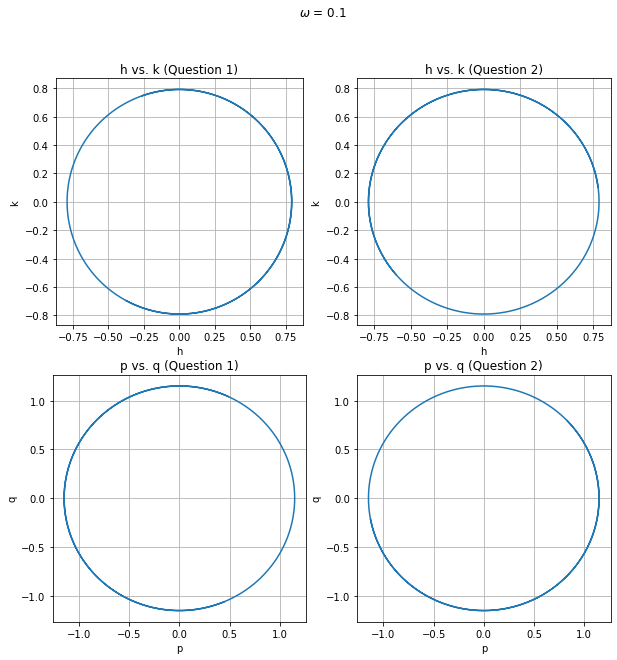

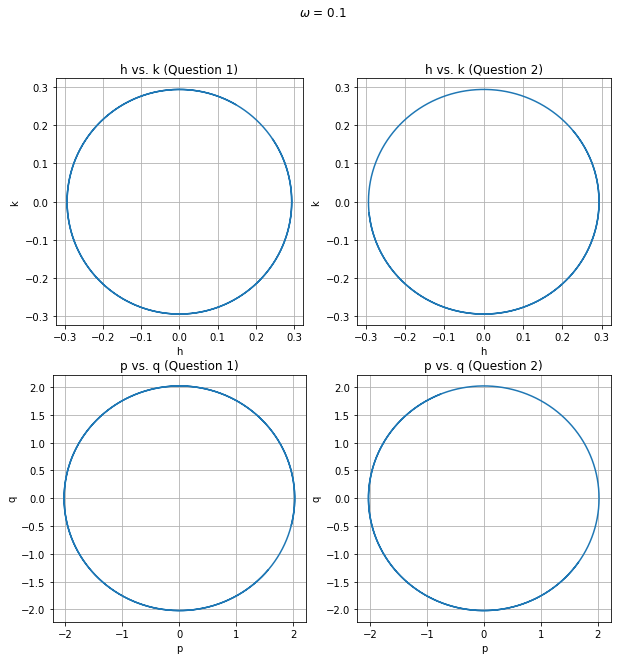

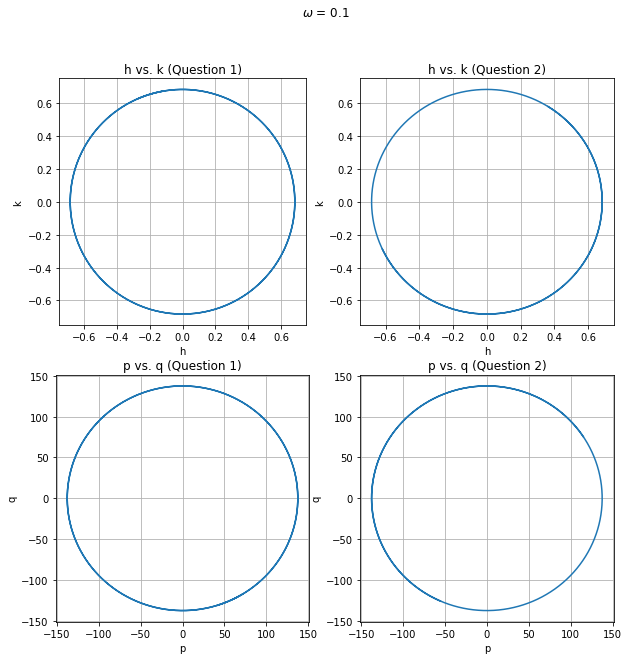

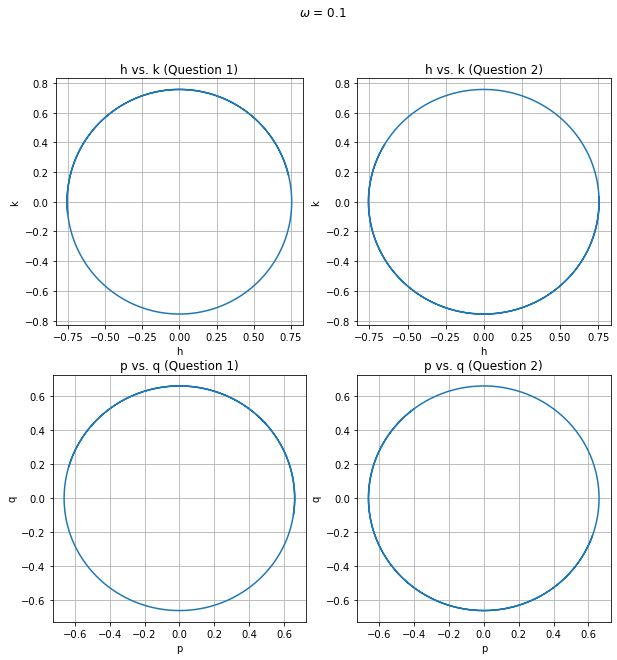

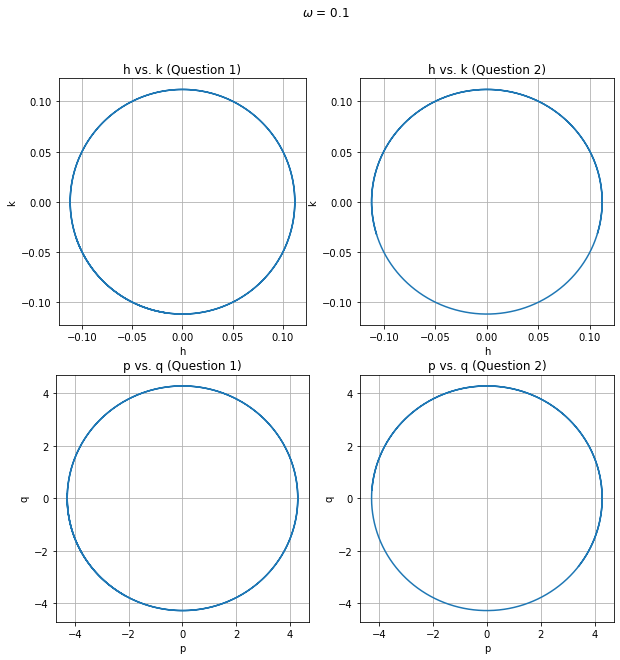

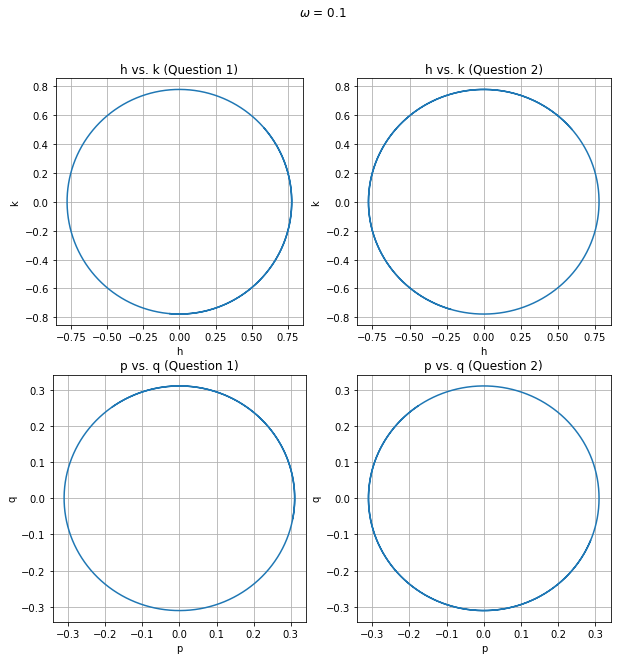

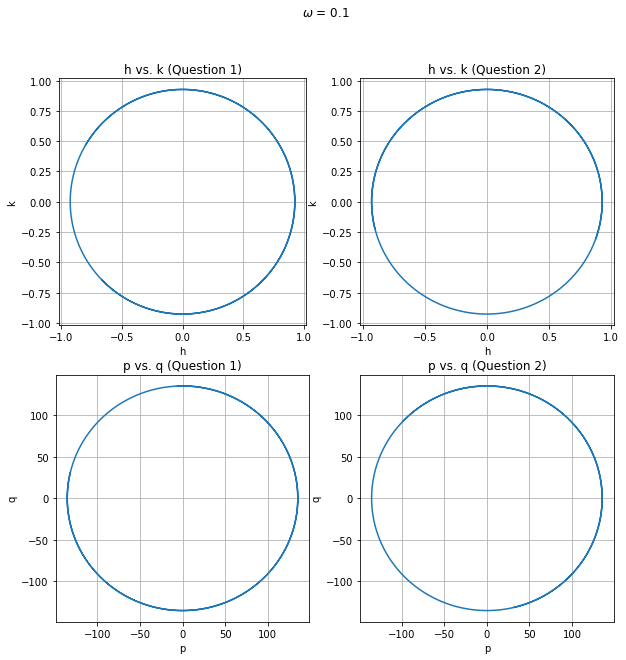

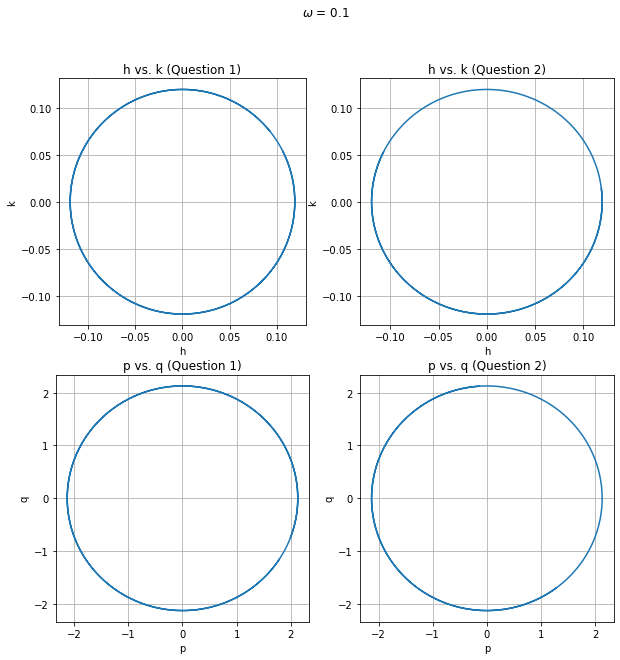

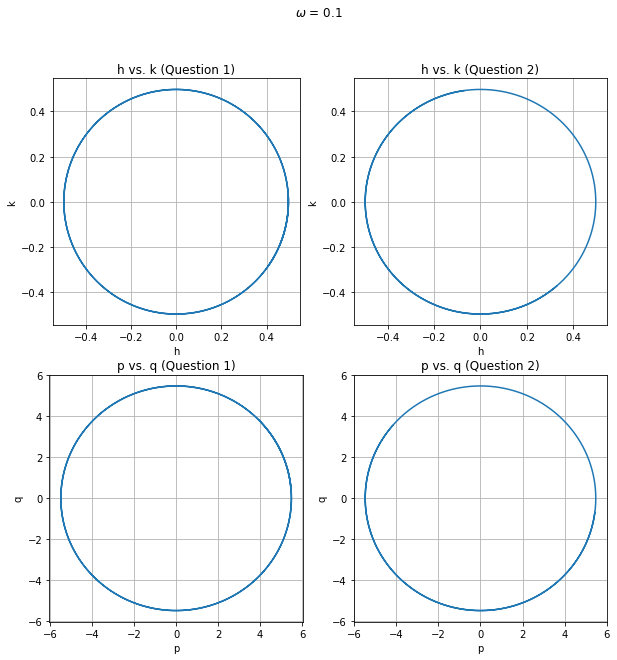

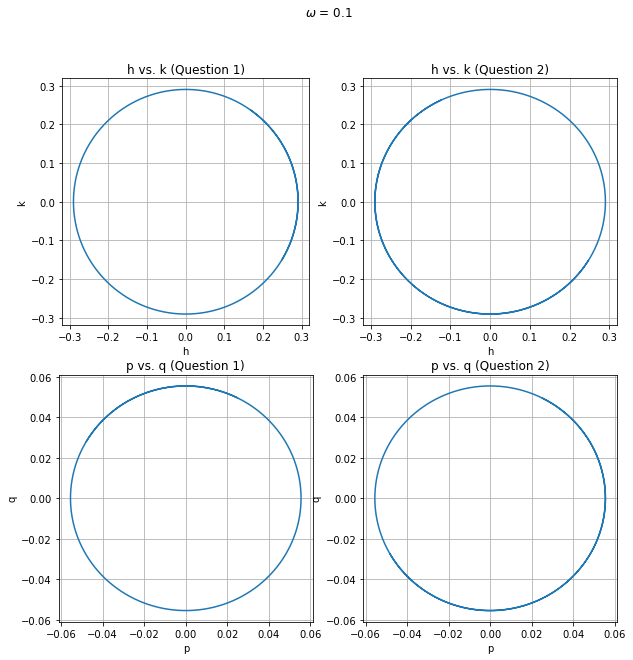

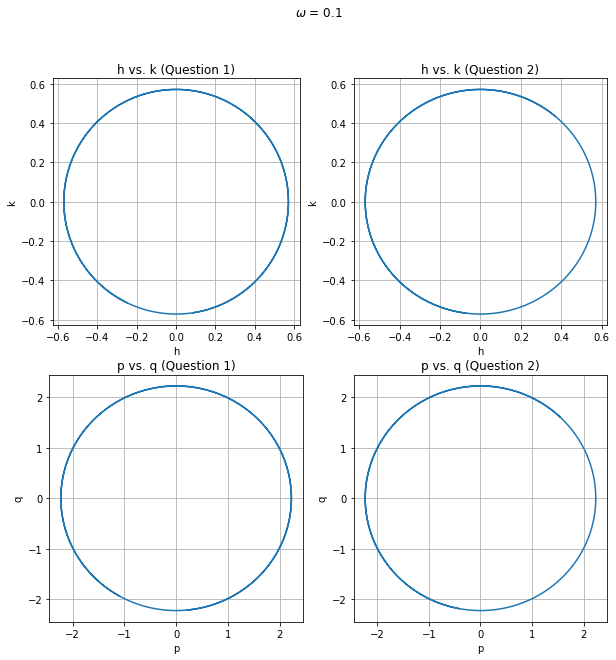

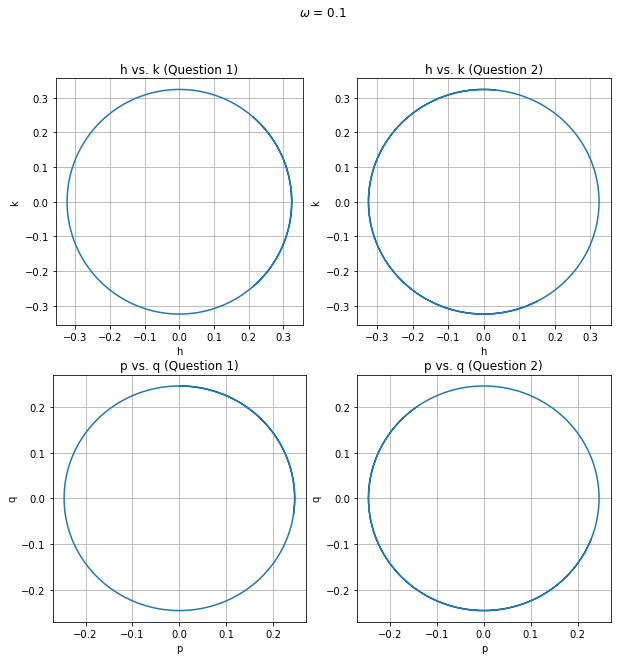

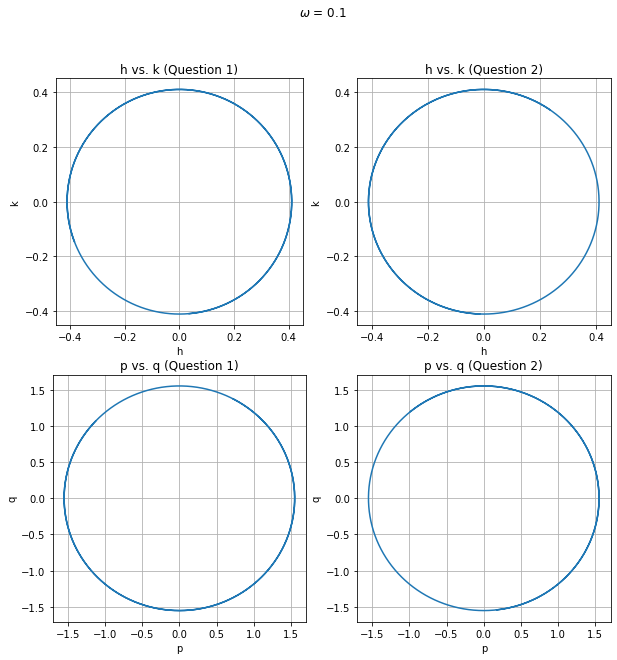

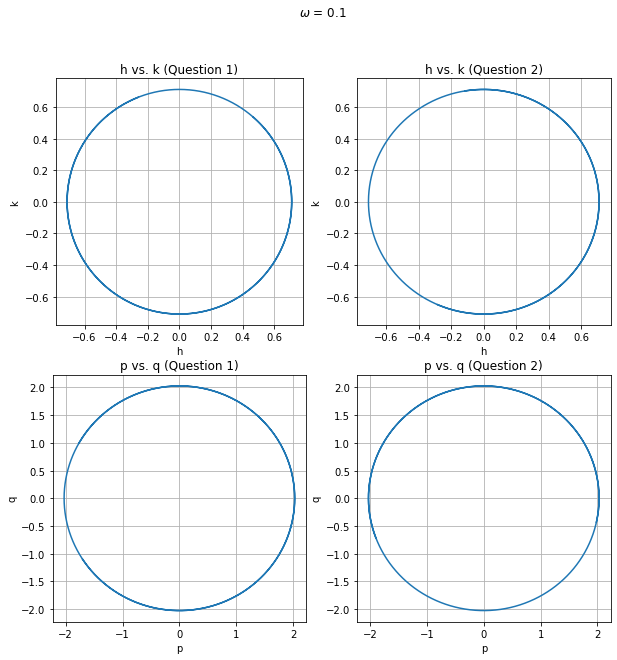

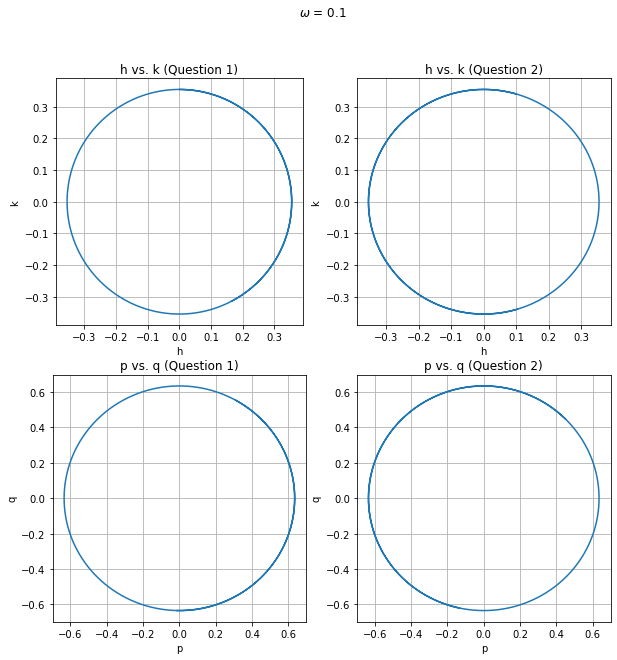

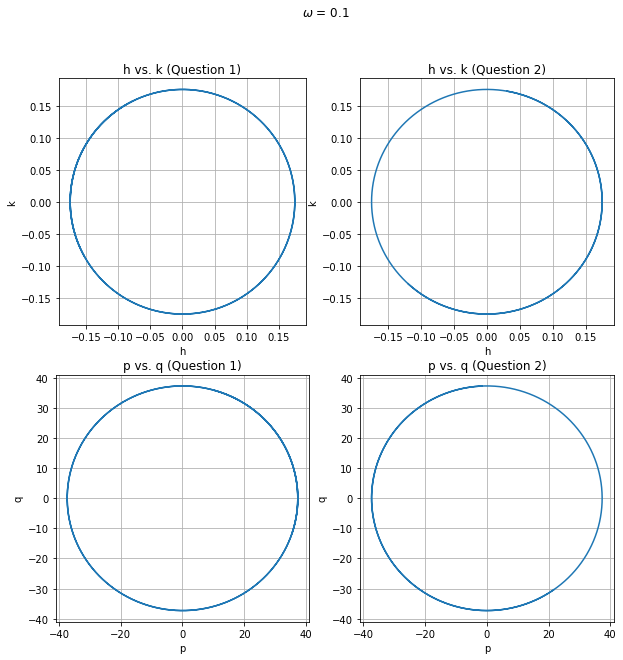

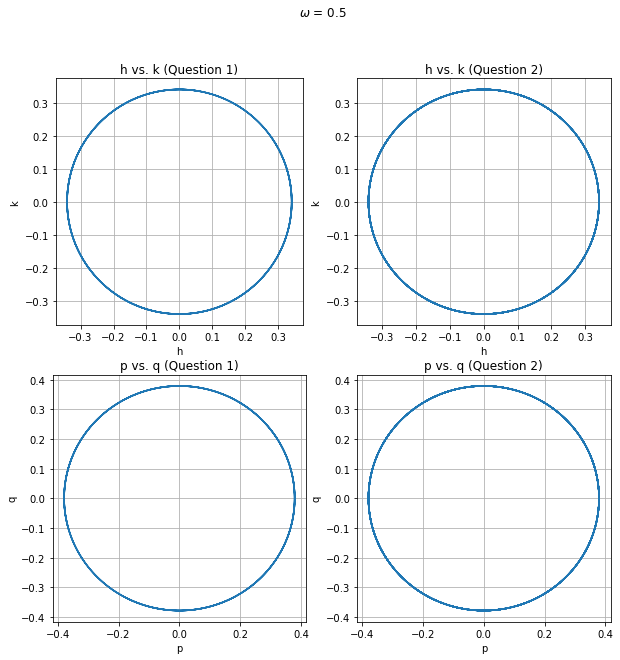

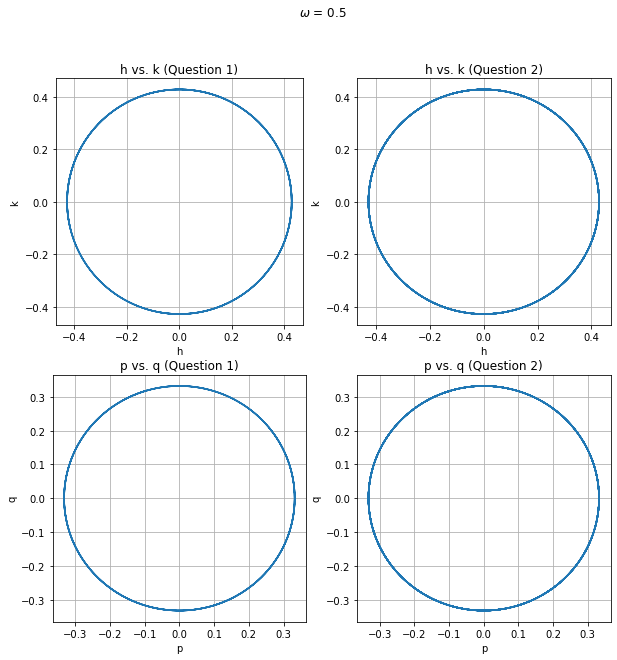

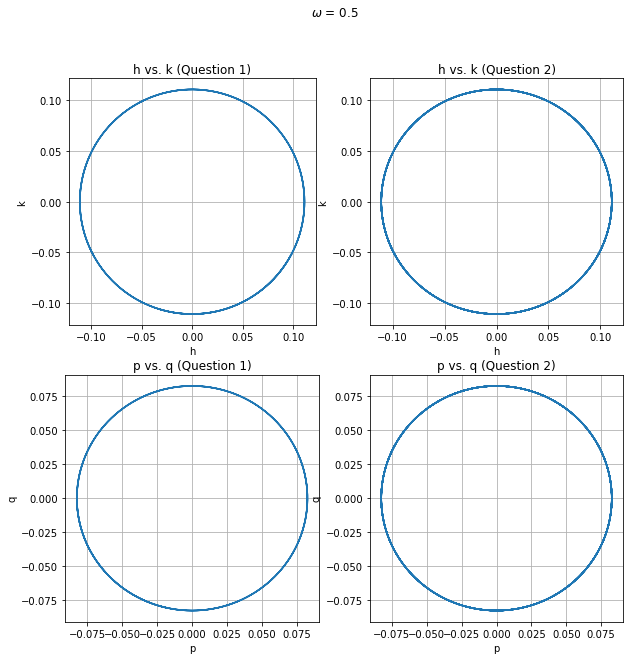

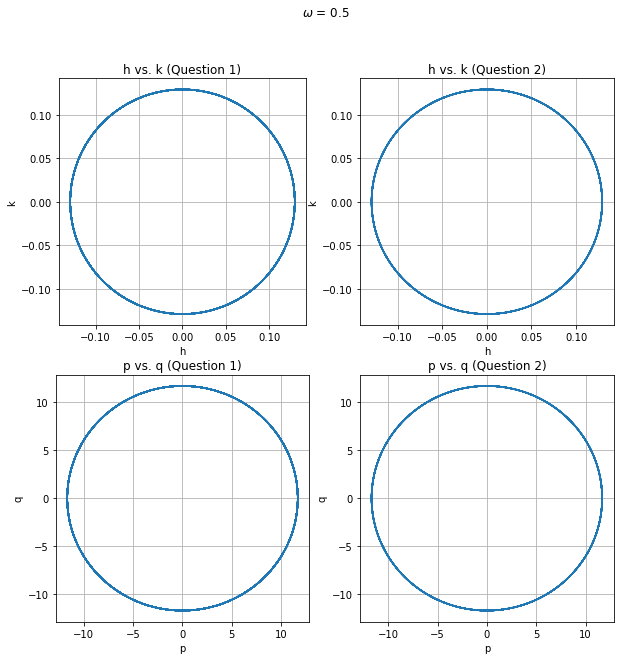

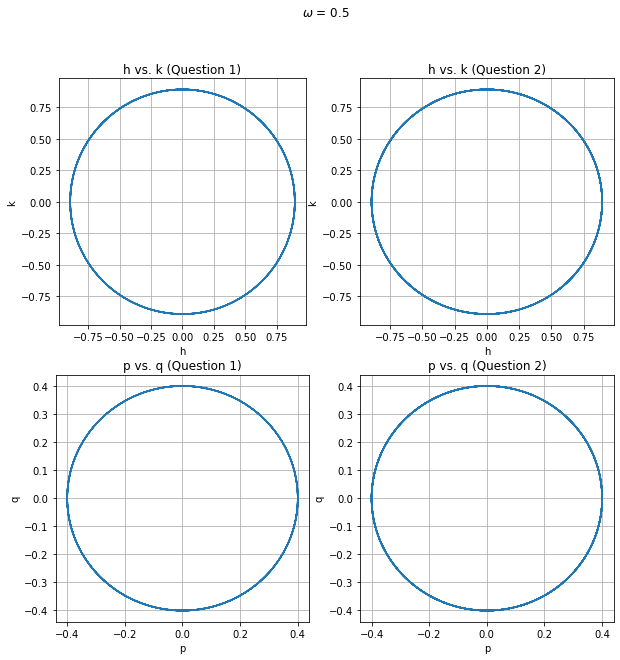

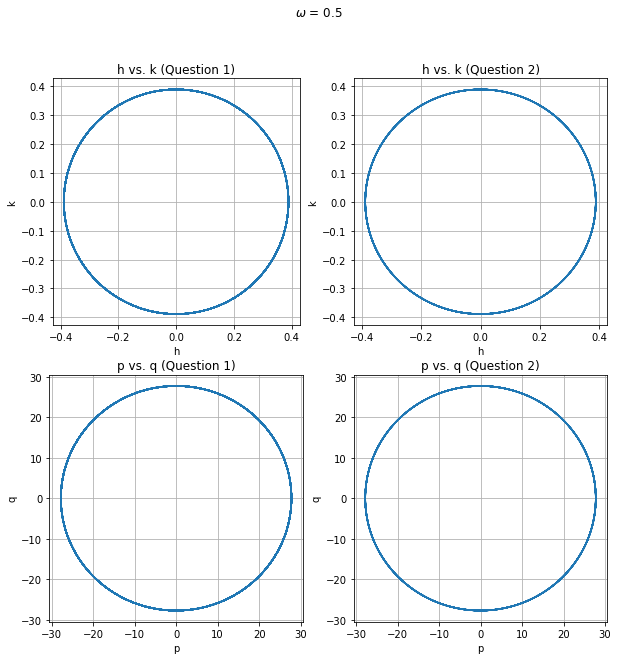

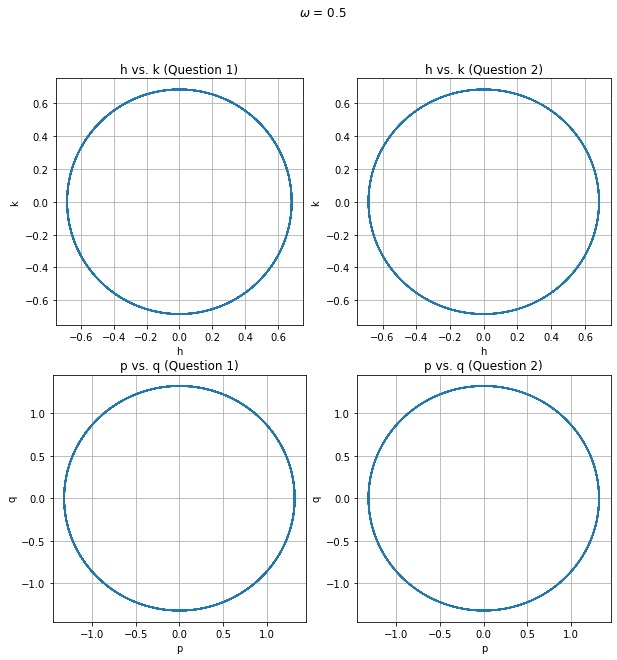

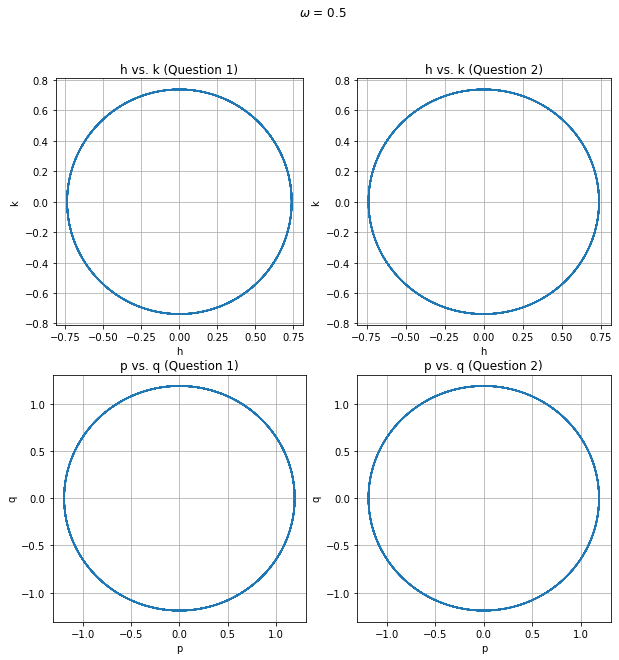

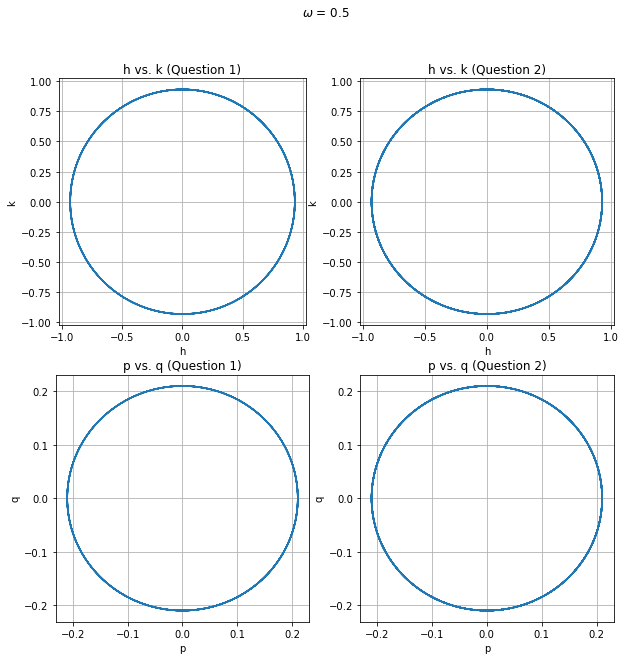

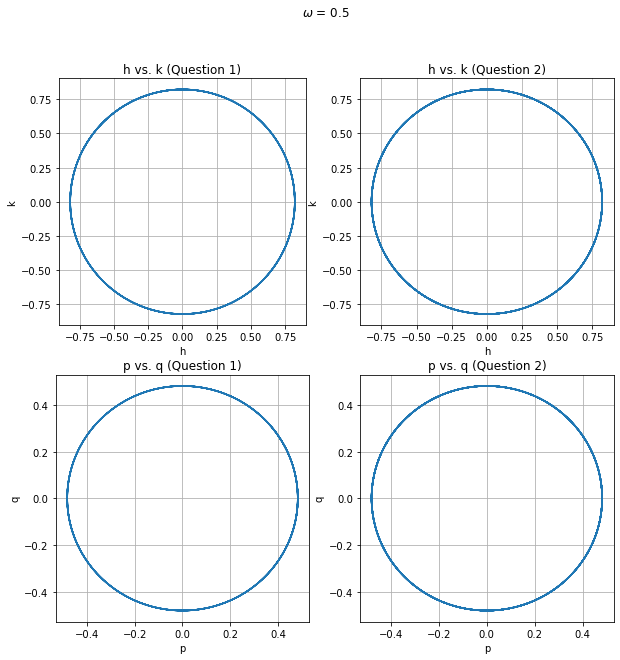

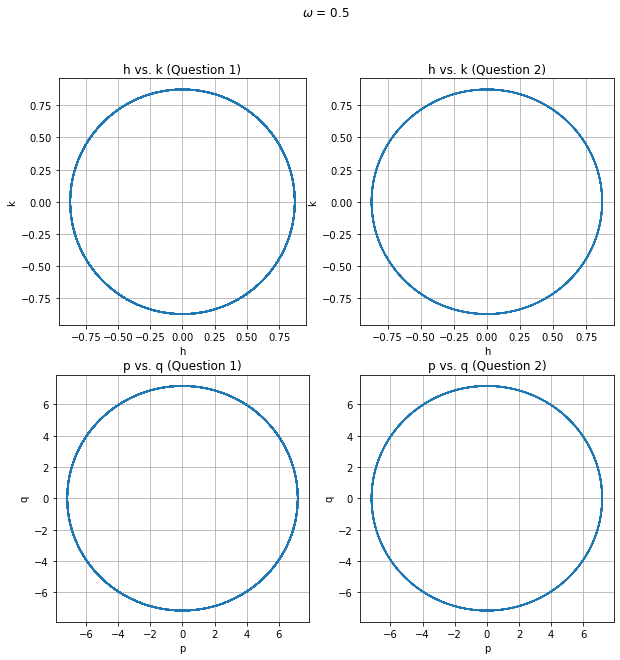

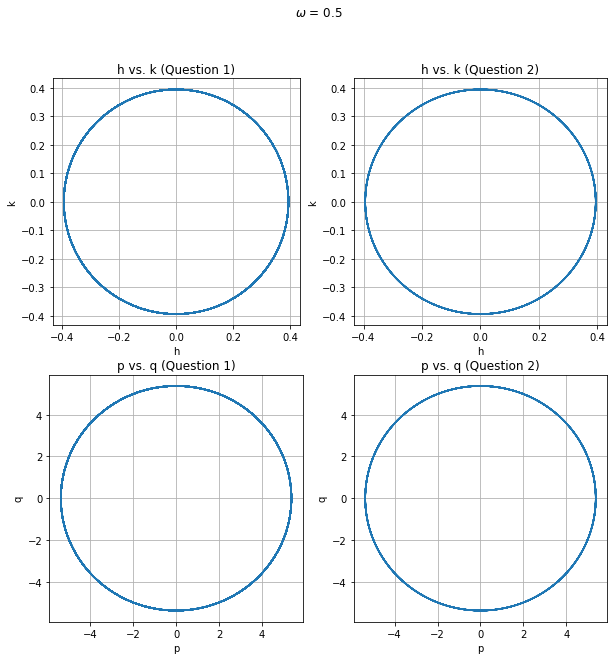

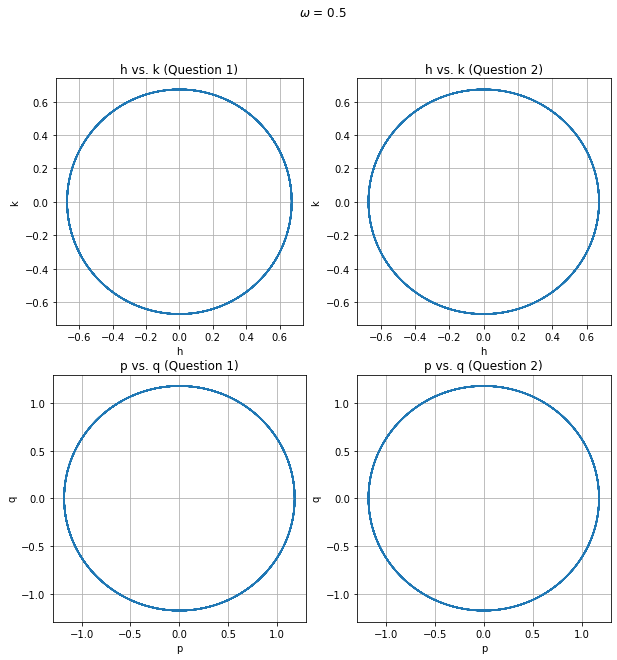

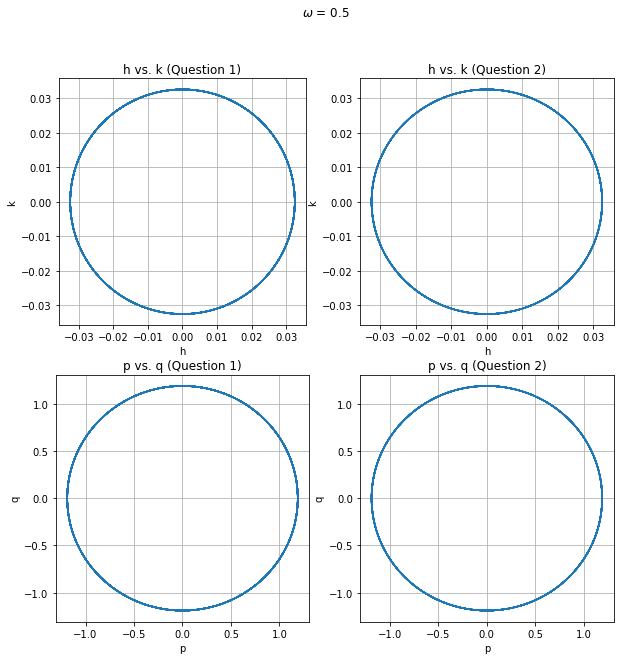

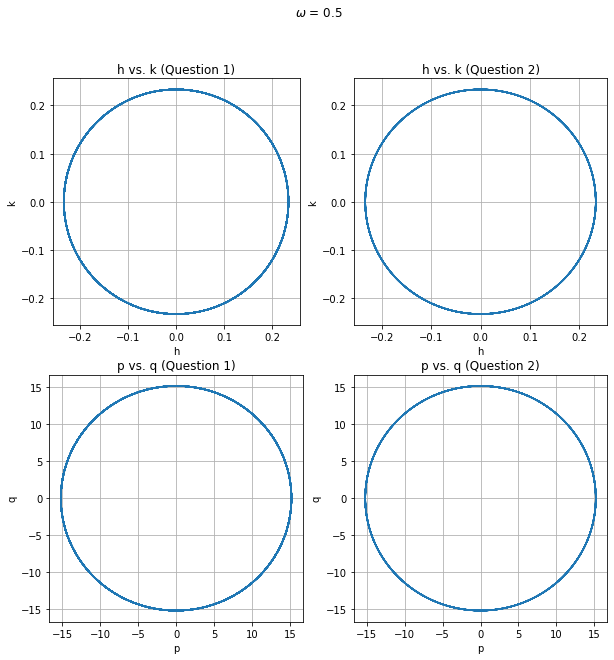

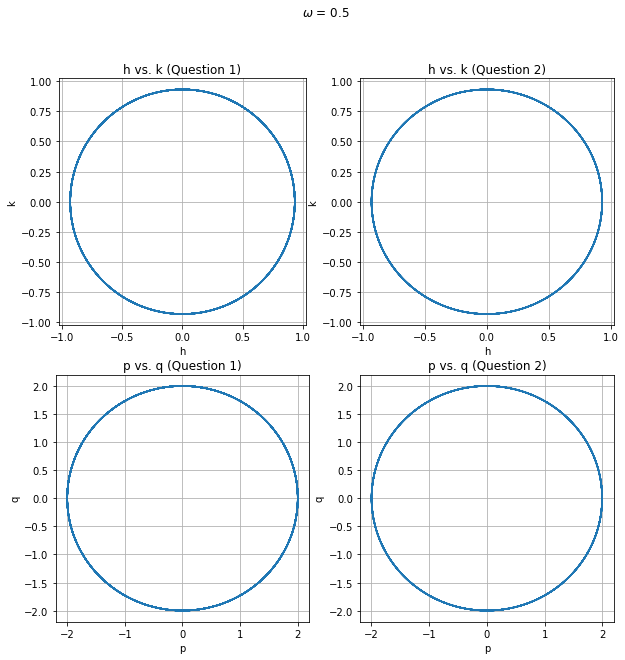

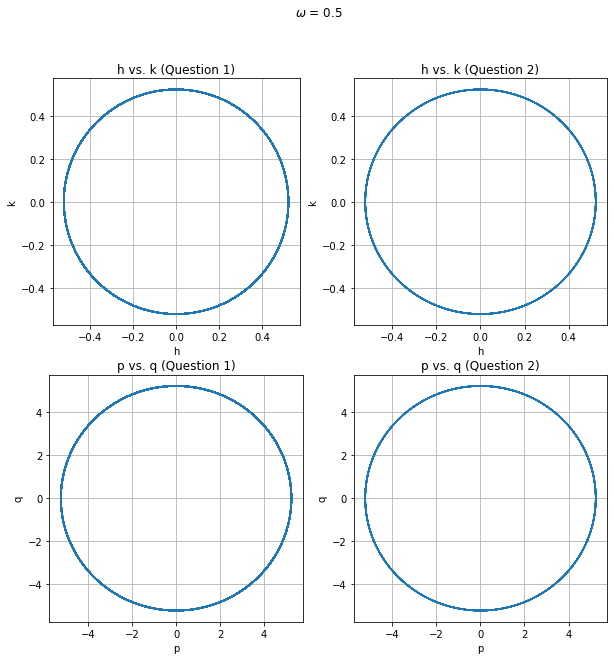

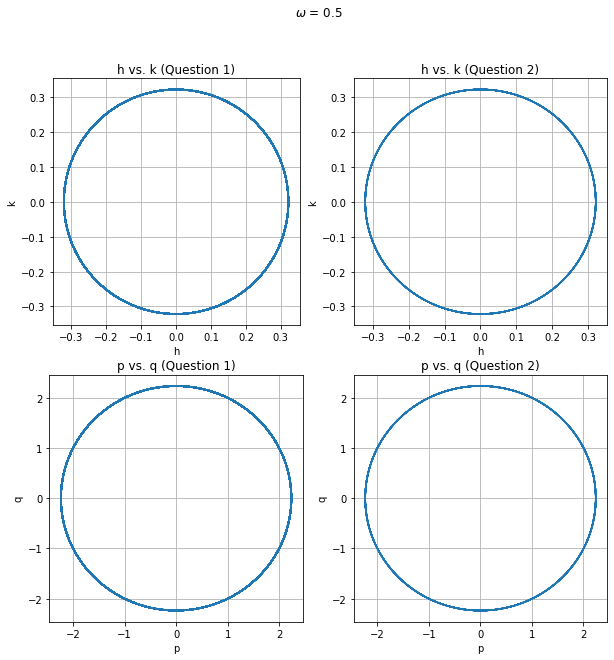

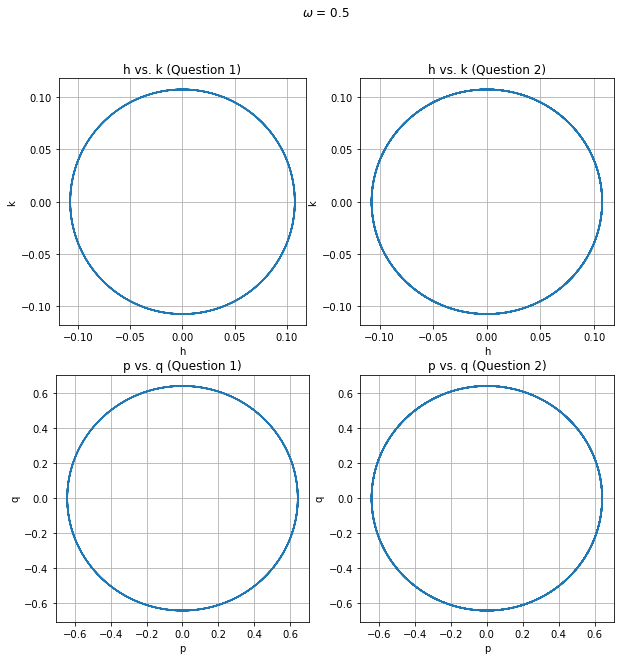

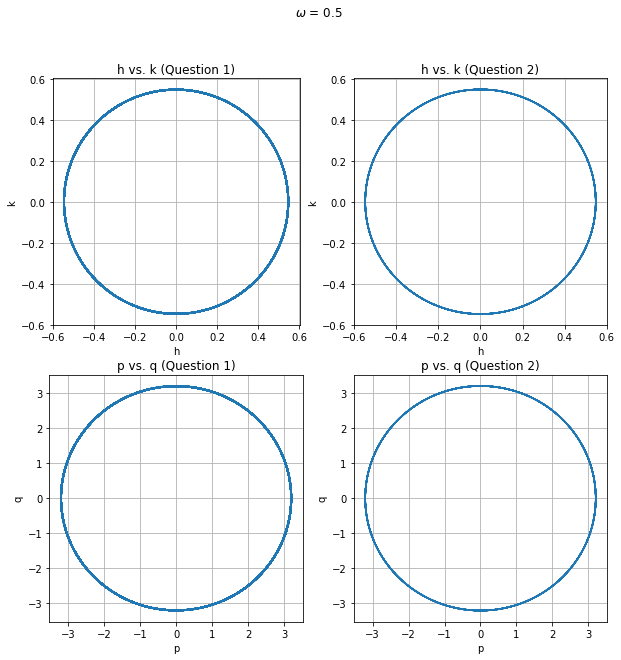

In [26]:
#Kanishka Deepak
#AE 502 - Homework Project 3

#3

import numpy as np
import matplotlib.pyplot as plt

def Q1_vars(i_con, pert, tspan, steps):
    lp0, gp0, hp0, Lp0, Gp0, Hp0 = i_con
    
    adds = np.ones(steps)
    Lp = Lp0 * adds 
    lp = 1/(Lp**3) * tspan + lp0
    gp = gp0 * adds
    hp = hp0 * adds
    L3 = np.ones(steps)
    G3 = Gp0 * adds
    H3 = Hp0 * adds
    
    l3 = lp/(1 + 3 * pert * L3**2 * H3)
    g3 = gp
    h3 = hp - pert * L3**3 * l3

    # Keplerian elements
    M_1 = l3
    w_1 = g3
    omega = h3 - g3

    return M_1, w_1, omega


def Q2_vars(i_con, pert, tspan, steps):
    l0, g0, h0, L0, G0, H0 = i_con

    adds = np.ones(steps)
    g = g0 * adds
    L = L0 * adds
    G = G0 * adds
    H = H0 * adds
    h = pert * tspan + h0
    l = 1/(L**3) * tspan + l0

    # Keplerian elements
    M_1 = l
    w_1 = g
    omega = h - g

    return M_1, w_1, omega

#Main

mu = 1
a = 1  # DU
n = np.sqrt(mu/a**3)
rotation = 0.01
e = 0.5
i_deg = 45  # deg
duration = 100  # TU
steps = 10000
tspan = np.linspace(0, duration, steps)

w_range = [0.02, 0.1, 0.5]  # 1/TU



# propagate 

for j in range(len(w_range)):
    perturb = w_range[j]
    for jj in range(20):
        i_deg_var = np.random.rand() * 2 * np.pi 
        e_var = np.random.rand()

        #l,g,h,G,H
        l_var = np.random.rand() * 2 * np.pi
        g_var = np.random.rand() * 2 * np.pi
        h_var = np.random.rand() * 2 * np.pi
        G_var = L * (1 - e_var ** 2) ** (1 / 2)
        H_var = G_var * np.cos(i_deg_var)

        # initial conditions
        i_con = np.array([l_var, g_var, h_var, L, G_var, H_var])

        M1, w1, omega1 = Q1_vars(i_con, perturb, tspan, steps)
        h1 = e_var * np.sin(w1 + omega1)
        k1 = e_var * np.cos(w1 + omega1)
        p1 = np.tan(i_deg_var / 2) * np.sin(omega1)
        Q1 = np.tan(i_deg_var / 2) * np.cos(omega1)

        M2, w2, omega2 = Q2_vars(i_con, perturb, tspan, steps)
        h2 = e_var * np.sin(w2 + omega2)
        k2 = e_var * np.cos(w2 + omega2)
        p2 = np.tan(i_deg_var / 2) * np.sin(omega2)
        Q2 = np.tan(i_deg_var / 2) * np.cos(omega2)

        fig = plt.figure(j + 2 , figsize=(10, 10))
        if j == 0:
            fig.suptitle(r"$\omega$ = 0.02")
        elif j == 1:
            fig.suptitle(r"$\omega$ = 0.1")
        else:
            fig.suptitle(r"$\omega$ = 0.5")

        ax1 = fig.add_subplot(2, 2, 1)
        ax1.set_aspect("equal")
        ax1.set_xlabel("h")
        ax1.set_ylabel("k")
        ax1.set_title("h vs. k (Question 1)")
        ax1.grid(True)
        ax1.plot(h1, k1)

        ax2 = fig.add_subplot(2, 2, 2)
        ax2.set_xlabel("h")
        ax2.set_ylabel("k")
        ax2.set_title("h vs. k (Question 2)")
        ax2.grid(True)
        ax2.plot(h2, k2)

        ax3 = fig.add_subplot(2, 2, 3)
        ax3.set_xlabel("p")
        ax3.set_ylabel("q")
        ax3.set_title("p vs. q (Question 1)")
        ax3.grid(True)
        ax3.plot(p1, Q1)
        
        ax4 = fig.add_subplot(2, 2, 4)
        ax4.set_xlabel("p")
        ax4.set_ylabel("q")
        ax4.set_title("p vs. q (Question 2)")
        ax4.grid(True)
        ax4.plot(p2, Q2)
        plt.pause(0.1)
        

plt.show()